#                                                  Dataset Exploration

Here we'll be exploring how each of the features we have so far relates to the target variable "status"

## Importing the dataset

In [1]:
import pandas as pd
startups = pd.read_csv('data/startups_2.csv', index_col=0)
startups[:3]

,funding_total_usd,state_code,funding_rounds,founded_at,first_funding_at,last_funding_at,Category_Software,Category_Biotechnology,Category_Mobile,Category_Enterprise Software,...,undisclosed_funding_total_usd,undisclosed_funding_rounds,venture_funding_total_usd,venture_funding_rounds,number_of_acquisitions,number_of_investments,number_of_unique_investments,number_of_investors_per_round,avg_amount_invested_per_round,status
/organization/-qounter,0.000023,DE,0.055556,0.005917,0.002825,0.027344,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,operating
/organization/004-technologies,0.000000,IL,0.000000,0.018409,0.002410,0.033203,1,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,operating
/organization/0xdata,0.001117,CA,0.166667,0.015779,0.003906,0.001953,0,0,0,0,...,0.0,0.0,0.001739,0.214286,0.0,0.0,0.0,0.104167,0.000477,operating


### Let's start exploring the numerical features
Let's see a heatmap chart of  the average features for 'acquired' startups against the complete set of startups

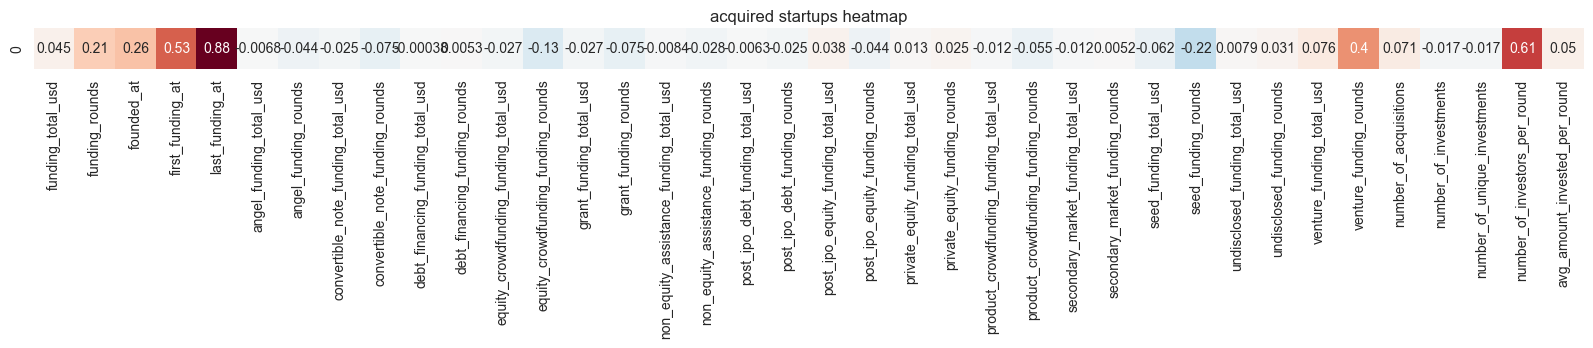

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot_avg_status_against_avg_total(df, status):
    startups_numeric = df.filter(regex=('(number_of|avg_).*|.*(funding_total_usd|funding_rounds|_at|status)'))
    startups_acquired = startups_numeric[startups_numeric['status'] == status]

    startups_numeric = startups_numeric.drop('status', 1)
    startups_acquired = startups_acquired.drop('status', 1)

    fig, ax = plt.subplots(figsize=(20,20)) 
    ax.set_title(status+' startups heatmap')
    sns.heatmap((pd.DataFrame(startups_acquired.mean()).transpose() -startups_numeric.mean())/startups_numeric.std(ddof=0), annot=True, cbar=False, square=True, ax=ax)

plot_avg_status_against_avg_total(startups, 'acquired')

The same for 'closed':

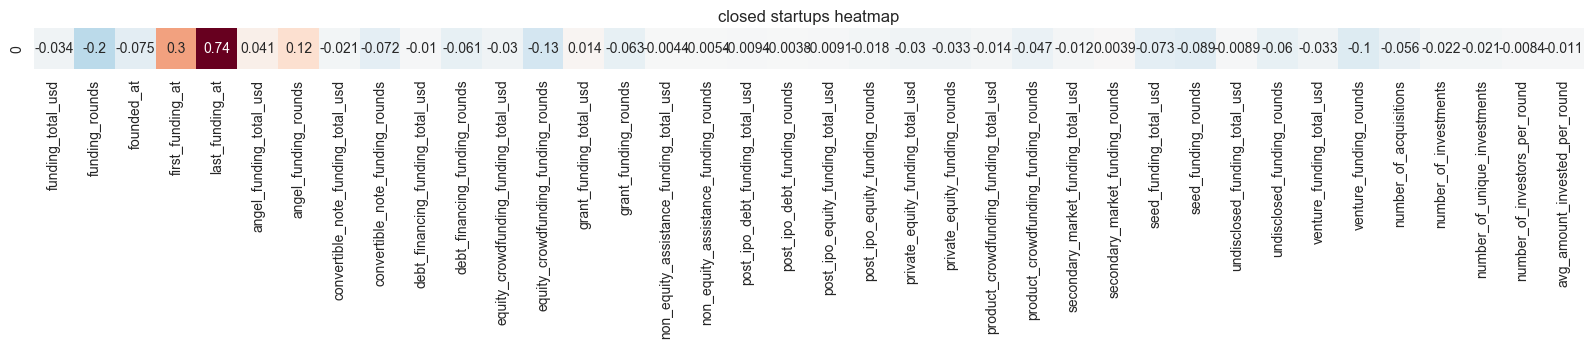

In [3]:
plot_avg_status_against_avg_total(startups, 'closed')

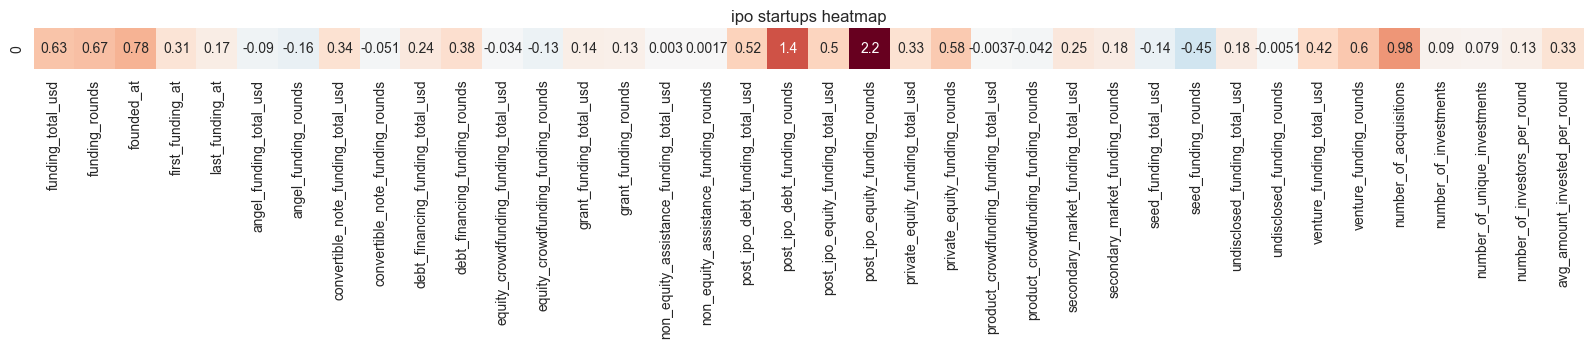

In [4]:
plot_avg_status_against_avg_total(startups, 'ipo')

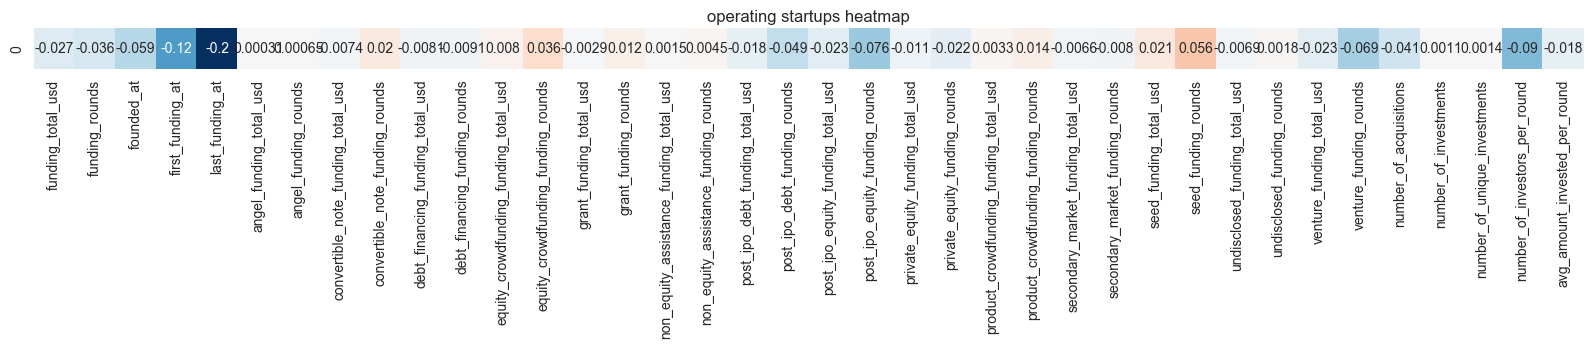

In [5]:
plot_avg_status_against_avg_total(startups, 'operating')

We can see some logic behavior here. Acquired startups tend to have high venture_funding_rounds and low seed_funding_rounds, while closed startups have few funding_rounds in general and relatively high angel_funding_rounds.

Regarding the dates variables we also have logical results. Acquired and closed startups haven't had a funding for a higher amount of time.
While operating startups had a funding not so long ago when compared to the rest of the startups.

In [7]:
# Produce a scatter matrix for each pair of features in the data
#startups_funding_rounds = startups_numeric.filter(regex=('.*funding_total_usd'))
#pd.scatter_matrix(startups_funding_rounds, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## Applying PCA to discover which features best explain the variance in the dataset

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,angel_funding_total_usd,angel_funding_rounds,convertible_note_funding_total_usd,convertible_note_funding_rounds,debt_financing_funding_total_usd,...,seed_funding_rounds,undisclosed_funding_total_usd,undisclosed_funding_rounds,venture_funding_total_usd,venture_funding_rounds,number_of_acquisitions,number_of_investments,number_of_unique_investments,number_of_investors_per_round,avg_amount_invested_per_round
/organization/-qounter,0.000023,0.055556,0.005917,0.002825,0.027344,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
/organization/004-technologies,0.000000,0.000000,0.018409,0.002410,0.033203,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
/organization/0xdata,0.001117,0.166667,0.015779,0.003906,0.001953,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.0,0.0,0.001739,0.214286,0.0,0.0,0.0,0.104167,0.000477


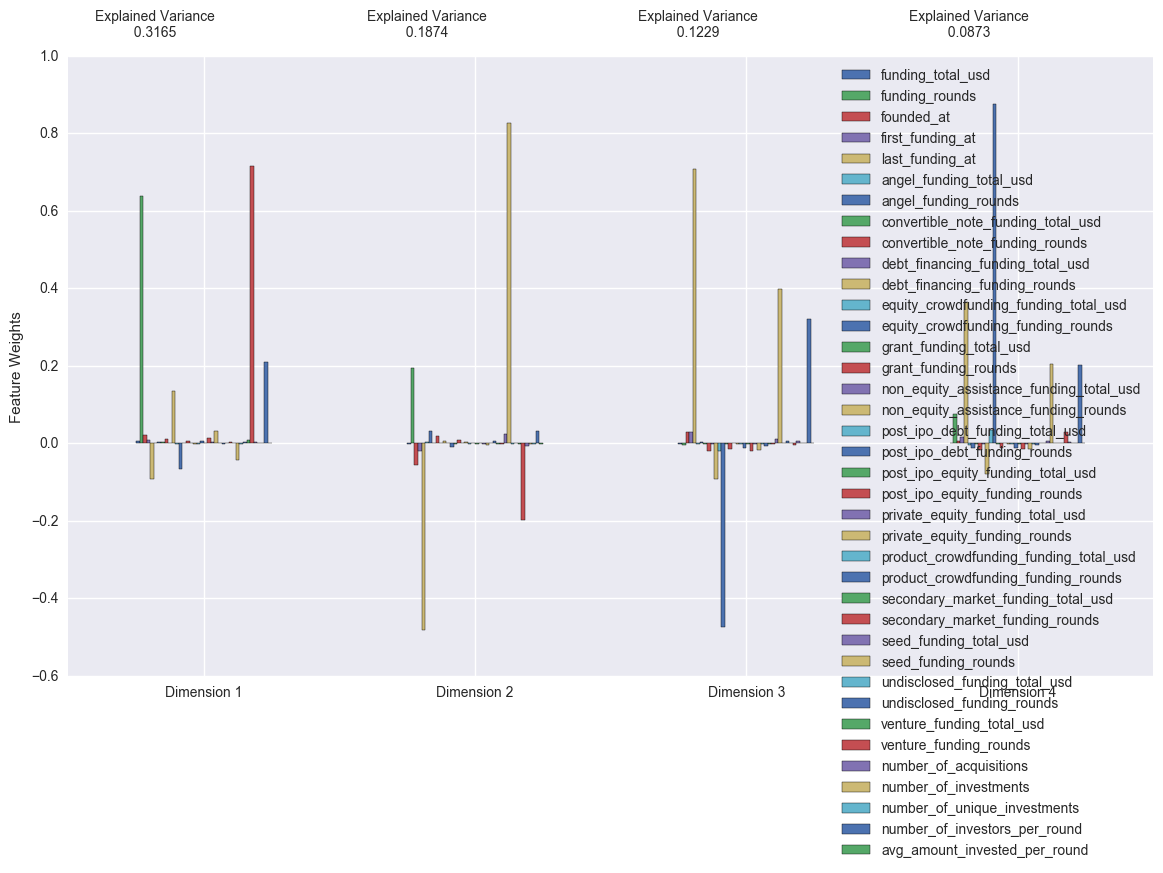

In [6]:
from sklearn.decomposition import PCA
import visuals as vs


startups_numeric = startups.filter(regex=('(number_of|avg_).*|.*(funding_total_usd|funding_rounds|_at)'))

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=4)
pca.fit(startups_numeric)


# Generate PCA results plot
pca_results = vs.pca_results(startups_numeric, pca)
startups_numeric[:3]

In [7]:
good_data = startups_numeric
import numpy as np
dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
components.index = dimensions
components

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,angel_funding_total_usd,angel_funding_rounds,convertible_note_funding_total_usd,convertible_note_funding_rounds,debt_financing_funding_total_usd,...,seed_funding_rounds,undisclosed_funding_total_usd,undisclosed_funding_rounds,venture_funding_total_usd,venture_funding_rounds,number_of_acquisitions,number_of_investments,number_of_unique_investments,number_of_investors_per_round,avg_amount_invested_per_round
Dimension 1,0.0062,0.6377,0.0210,0.0094,-0.0906,0.0022,0.0031,0.0026,0.0109,0.0007,...,-0.0415,-0.0001,0.0041,0.0084,0.7168,0.0046,0.0002,0.0002,0.2107,0.0018
Dimension 2,-0.0013,0.1952,-0.0555,-0.0190,-0.4816,0.0027,0.0332,0.0006,0.0196,0.0000,...,0.8273,-0.0006,0.0018,-0.0023,-0.1967,-0.0053,-0.0006,-0.0006,0.0325,-0.0016
Dimension 3,-0.0001,-0.0040,0.0303,0.0295,0.7086,-0.0002,0.0031,-0.0007,-0.0199,-0.0007,...,0.3991,0.0009,0.0061,0.0016,-0.0039,0.0074,0.0009,0.0009,0.3209,0.0015
Dimension 4,0.0001,0.0752,0.0059,0.0162,0.3660,-0.0027,-0.0125,-0.0005,-0.0178,-0.0006,...,0.2052,0.0005,0.0002,0.0019,0.0286,0.0051,0.0004,0.0004,0.2016,0.0008


The most important variables here are:

Dimension1: funding_rounds, -last_funding_at, debt_financing_funding_rounds, venture_funding_rounds

Dimension2: -funding_rounds, -last_funding_at, -seed_funding_rounds, venture_funding_rounds

Dimension3: -last_funding_at, equity_crowdfunding_funding_rounds, -seed_funding_rounds

Dimension4: last_funding_at, equity_crowdfunding_funding_rounds, seed_funding_rounds

### Now I'll apply the same PCA algorithm, but just for startups with acquired status

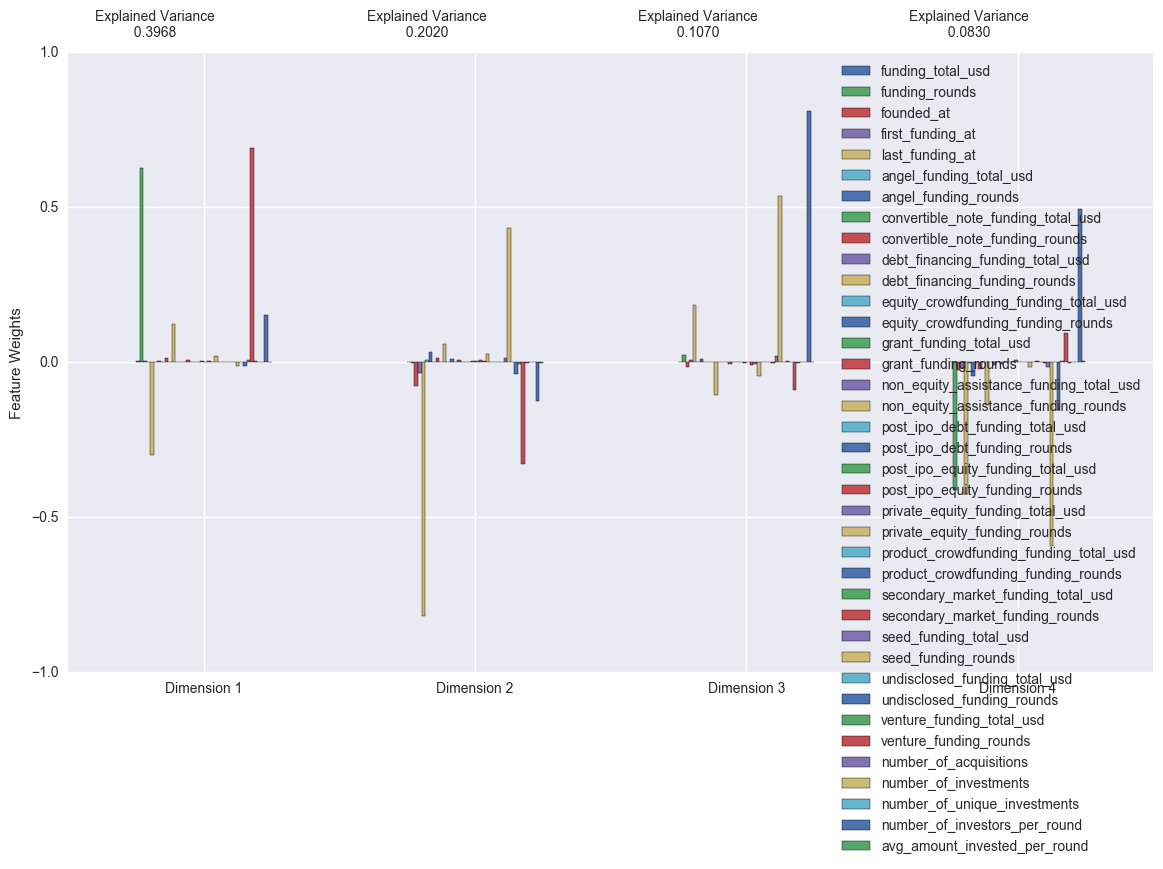

In [9]:
startups_numeric_acquired = startups.filter(regex=('(number_of|avg_).*|.*(funding_total_usd|funding_rounds|_at|status)'))
startups_numeric_acquired = startups_numeric_acquired[startups_numeric_acquired['status'] == 'acquired']
startups_numeric_acquired = startups_numeric_acquired.drop('status', 1)

pca = PCA(n_components=4)
pca.fit(startups_numeric_acquired)

# Generate PCA results plot
pca_results = vs.pca_results(startups_numeric_acquired, pca)

Okay. We see now that some features tend to express more variance than others.

We also see that funding_rounds variable tend to dominate against funding_total_usd values.
And also, that last_funding_at is a very expressing variable.


### Let's start playing with non-numerical variables: dates and Categories

In [11]:
#startups_numeric = df.filter(regex=('.*(funding_total_usd|funding_rounds|status)'))
startups_non_numeric = startups.filter(regex=('^((?!(_acquisitions|_investments|_per_round|funding_total_usd|funding_rounds|_at)).)*$'))
startups_non_numeric[:3]

,state_code,Category_Software,Category_Biotechnology,Category_Mobile,Category_Enterprise Software,Category_E-Commerce,Category_Curated Web,Category_Health Care,Category_Social Media,Category_Advertising,...,Category_Search,Category_Semiconductors,Category_Information Technology,Category_FinTech,Category_Retail,Category_Financial Services,Category_Messaging,Category_Social Network Media,Category_Startups,status
/organization/-qounter,DE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,operating
/organization/004-technologies,IL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,operating
/organization/0xdata,CA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,operating


### Let's try some DecisionTrees for categories and see which performance we get. 

In [12]:
startups_non_numeric['status'].value_counts()
startups_non_numeric['acquired'] = startups_non_numeric['status'].map({'operating': 0, 'acquired':1, 'closed':0, 'ipo':0})
startups_non_numeric = startups_non_numeric.drop('status', 1)
startups_non_numeric[:3]

,state_code,Category_Software,Category_Biotechnology,Category_Mobile,Category_Enterprise Software,Category_E-Commerce,Category_Curated Web,Category_Health Care,Category_Social Media,Category_Advertising,...,Category_Search,Category_Semiconductors,Category_Information Technology,Category_FinTech,Category_Retail,Category_Financial Services,Category_Messaging,Category_Social Network Media,Category_Startups,acquired
/organization/-qounter,DE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
/organization/004-technologies,IL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
/organization/0xdata,CA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn import tree
def visualize_tree(tree_model, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree_model -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        tree.export_graphviz(tree_model, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [15]:
#import visuals_tree as vs_tree
#vs_tree.ModelLearning(startups_non_numeric.drop(['acquired','state_code'], 1), startups_non_numeric['acquired'])
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn import tree
from sklearn import grid_search
from sklearn import preprocessing


#clf = tree.DecisionTreeClassifier(random_state=0)
#cross_val_score(clf, startups_non_numeric.drop(['acquired','state_code'], 1),  startups_non_numeric['acquired'], cv=10)


#Drop state_code feature
features = startups_non_numeric.drop(['acquired','state_code'], 1)

#Convert state_code feature to number
#features = startups_non_numeric.drop(['acquired'], 1)
#features['state_code'] = preprocessing.LabelEncoder().fit_transform(features['state_code'])

#Convert state_code to dummy variables
features = pd.get_dummies(startups_non_numeric.drop(['acquired'], 1), prefix='state', columns=['state_code'])


#Merge numeric_features to non-numeric-features
features_all = pd.concat([features, startups_numeric], axis=1, ignore_index=False)
#features = features_all

features = startups_numeric






parameters = {'max_depth':range(5,20)}
clf = grid_search.GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=5, scoring='roc_auc')
clf.fit(X=features, y=startups_non_numeric['acquired'])
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 
print tree.export_graphviz(clf.best_estimator_, feature_names=list(features.columns))

(0.83932271629844135, {'max_depth': 5})
None


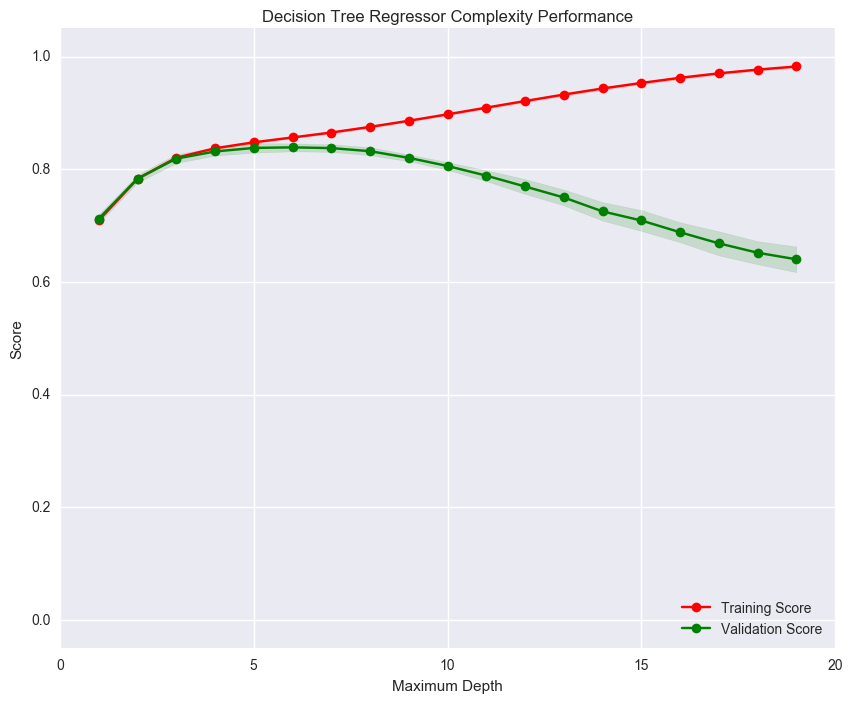

In [16]:
import visuals_tree as vs_tree
vs_tree = reload(vs_tree)
vs_tree.ModelComplexity(features_all, startups_non_numeric['acquired'])

### Only categories and states are not enough for making a good prediction. With that, maximum (roc_auc) of 0.64 was achieved. With attributes, a simple decisionTreeClassifier achieved 0.84 roc_auc.

## Saving the dataset ready to be tested by different learning algorithms

In [17]:
all = pd.concat([features_all, startups_non_numeric['acquired']], axis=1, ignore_index=False)
all.to_csv('data/startups_3.csv')


In [26]:
all_with_status = all.join(startups['status'])
all_with_status_without_operating = all_with_status[all_with_status['status'] != 'operating']
all_with_status_without_operating.shape
all_without_operating = all_with_status_without_operating.drop('status', 1)
all_without_operating.to_csv('data/startups_not_operating_3.csv')